# Logger

- common practice to give the logger the name of the class
- levels
    - severe
    - warning
    - info
    - config
    - fine
    - finer
    - finest
    

- methods
    -`log`   
    -`logp` takes additional args for class and method name
    - `logrb` takes resource boundle to localize message

In [11]:
import java.util.logging.*;

public class Foo {
    private static Logger logger = Logger.getLogger(Foo.class.getName());
    
    public void hi() {
        logger.log(Level.INFO, "Hi");
        logger.info("other hi");
    }
}

new Foo().hi()

## Guarded Logging
<img src=attachment:image.png width=700></img>

- prefer (4) as it is the improved version of (3) - string is only build when below inside log threshold
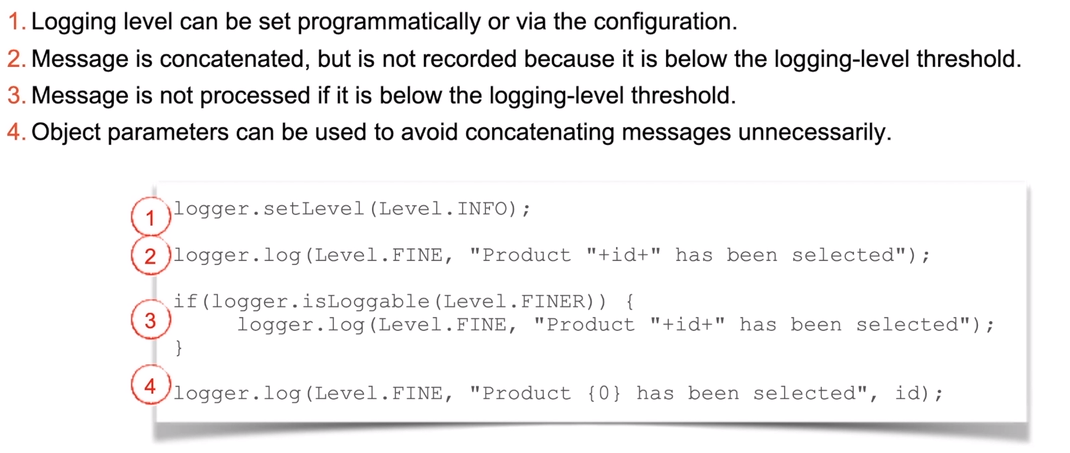

- logs are written to log handlers
- highly configurable in `logging.properties`
<img src=attachment:image.png width=700></img>
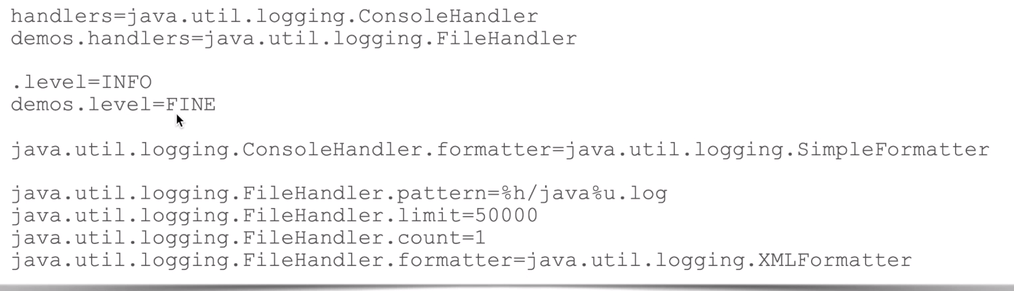

# Exceptions
- when exception is raised: normal program flow terminates
- checked exceptions
    - must be caught or
    - propagated
    - represent genuine problam that a normal functioning program my encounter and must handle
- unchecked exceptions
    - maybe caugth
    - no explicit propagation
    - usually evidence of bugs in the code

Hierarchy:
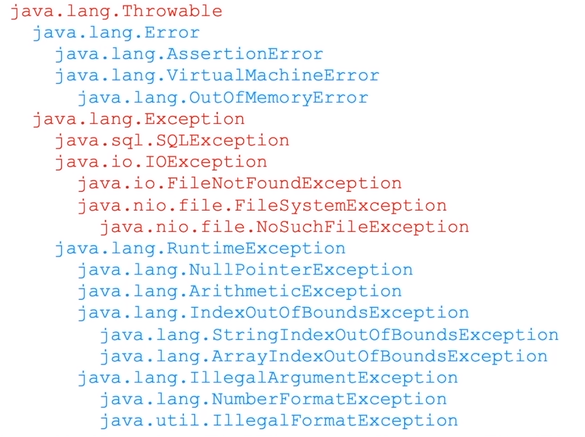

In [13]:
public class MyException extends RuntimeException {
    MyException(String msg) {
        super(msg);
    }
    
    MyException(String msg, Throwable cause) {
        super(msg, cause);
    }

}

throw new MyException("boom");

EvalException: boom

In [15]:
throw new MyException("boom", new IllegalAccessException("caught somewhere"));

EvalException: boom

## Catching Exceptions
- start with specific exceptions
- at the end have a generic handler

In [20]:
try {
    int exceptionSwitch = 1;
    
    // was required to compile
    if (exceptionSwitch == 1) {throw new IOException();}
    else if (exceptionSwitch == 2) {throw new NoSuchFieldException();}

    // do something    

} catch (IOException e) {
    // handling 
} catch (NoSuchFieldException | NoSuchFieldError e) {
    // other handling
} catch (Exception e) {
    // last resort handling
} finally {
    // always executed 
}


## Finally is ALWAYS executed

In [40]:
public void doThings() {
    try {
        a();
    }
    catch (ArithmeticException e) {
        // not executed
    } finally {
        // this is *ALWAYS* executed !
        System.out.println("FINALLY");
    }
}

public void a() {
    System.out.println("A()");
    if (true) throw new NullPointerException();
}

doThings()

A()
FINALLY


EvalException: null

In [5]:
public void doThings() {
    try {
        a();
    }
    catch (NullPointerException e) {
        System.out.println("CAUGHT NPE");        
        return;
    } finally {
        // this is *ALWAYS* executed !
        System.out.println("FINALLY");
    }
    
    System.out.println("never executed");
}

public void a() {
    System.out.println("A()");
    if (true) throw new NullPointerException();
}

doThings()

A()
CAUGHT NPE
FINALLY


## Auto-Closure (try-with)
- classes that implement `AutoClosable` interface can be used with try-with syntax
- multiple resources can be instanciated, (semicolon separate)
- automatic closoure of resources by implicit finally block

In [31]:
try (BufferedReader in = new BufferedReader(new FileReader("notexisting.txt"))) {
    System.out.println(in.readLine());
} catch (Exception e) {
   System.out.println("not found");
   System.out.println("error was: " + e);
   
   // checking for suppressed exceptions
   System.out.println(Arrays.toString(e.getSuppressed()));
}

not found
error was: java.io.FileNotFoundException: notexisting.txt (No such file or directory)
[]


### Suppressed Exceptions
<img src=attachment:image.png width=700></img>
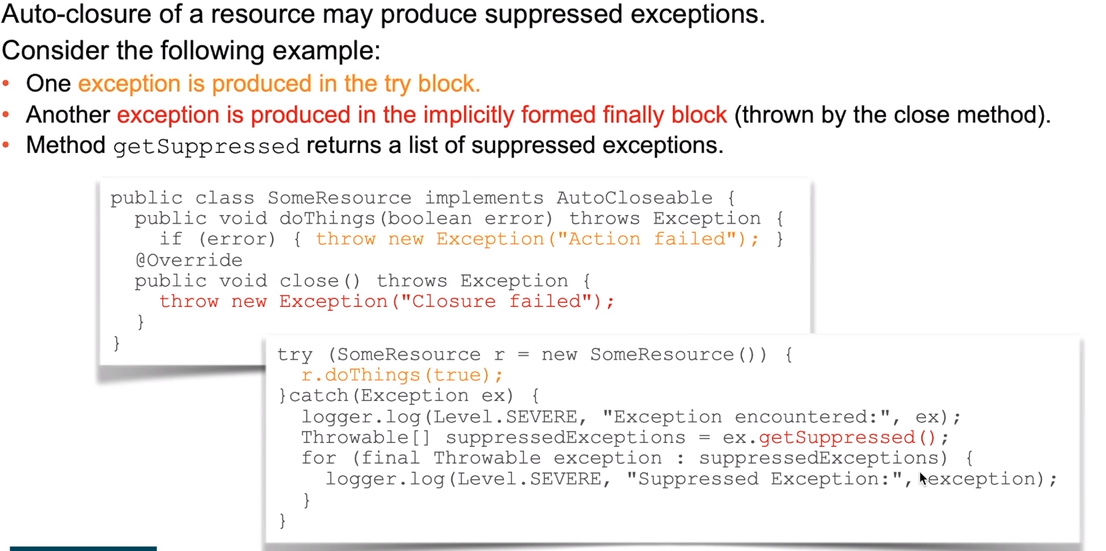

# Asserts
- verify application logic (e.g. post conditions)
- must not change state -> not enabled by default
- `assert <boolean expression>`
- `assert <boolean expression>: <error text expression>`
- **disabled by default**
- enable via `-ea` (-*e*nable*a*sserations) flag

In [33]:
assert 1 < 2 : "this is always true"